In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
#here x is training set and y is the label
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[156.5  143.5  153.5 ]
   [153.75 140.75 150.75]
   [156.   143.   153.  ]
   ...
   [ 32.25  32.25  42.25]
   [ 31.75  34.75  43.75]
   [ 31.75  34.75  43.75]]

  [[162.25 149.25 159.25]
   [158.   145.   155.  ]
   [161.25 148.25 158.25]
   ...
   [ 35.75  35.75  45.75]
   [ 33.75  36.75  45.75]
   [ 32.5   35.5   44.5 ]]

  [[157.   144.   154.  ]
   [155.75 142.75 152.75]
   [158.25 145.25 155.25]
   ...
   [ 33.75  33.75  43.75]
   [ 32.25  35.25  44.25]
   [ 30.75  33.75  42.75]]

  ...

  [[179.25 164.25 169.25]
   [181.75 166.75 171.75]
   [179.   164.   169.  ]
   ...
   [153.25 138.25 143.25]
   [148.5  133.5  138.5 ]
   [158.75 143.75 148.75]]

  [[192.75 177.75 182.75]
   [190.5  175.5  180.5 ]
   [191.75 176.75 181.75]
   ...
   [160.   145.   150.  ]
   [173.5  158.5  163.5 ]
   [149.5  134.5  139.5 ]]

  [[181.5  166.5  171.5 ]
   [185.75 170.75 175.75]
   [188.   173.   178.  ]
   ...
   [169.5  154.5  159.5 ]
   [168.5  153.5  158.5 ]
   [165.   150.   15

# To avoid Overshooting Loss function
1.Choose a small learning rate default 0.001 here we have taken 0.0001
2. There may be a chance of underfitting so increase the number of neurons
3. Add more Convolutional Layers to extract more features from images there may be a possibility that the model is unable to capture relevant features or model is confusing due to lack of feature so feed with more feature

## Building Model

In [42]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential



In [43]:
model= Sequential()

## Building cnn layer



In [44]:
# Add Conv2D layers
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))

# Add MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

In [45]:
# Add Conv2D layers
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))

# Add MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

In [46]:
# Add Conv2D layers
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))

# Add MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

In [47]:
# Add Conv2D layers
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))

# Add MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

In [49]:
# Add Conv2D layers
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu'))

# Add MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

In [50]:
model.add(Dropout(0.25))#to avoid overfitting

In [51]:
model.add(Flatten())

In [52]:
model.add(Dense(units=1500,activation='relu'))

In [53]:
model.add(Dropout(0.4))

In [54]:
#outputlayer
model.add(Dense(units=38,activation='softmax'))

## Compailing Model

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [58]:
training_history=model.fit(x=training_set,validation_data=validation_set,)epochs=10

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1784s 811ms/step - accuracy: 0.3763 - loss: 2.2303 - val_accuracy: 0.8383 - val_loss: 0.5149
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1619s 737ms/step - accuracy: 0.8388 - loss: 0.5156 - val_accuracy: 0.8764 - val_loss: 0.3836
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2159s 983ms/step - accuracy: 0.9062 - loss: 0.2884 - val_accuracy: 0.9322 - val_loss: 0.2046
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1737s 790ms/step - accuracy: 0.9343 - loss: 0.1982 - val_accuracy: 0.9462 - val_loss: 0.1701
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1677s 763ms/step - accuracy: 0.9512 - loss: 0.1444 - val_accuracy: 0.9483 - val_loss: 0.1694
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2026s 922ms/step - accuracy: 0.9612 - loss: 0.1133 - val_accuracy: 0.9611 - val_loss: 0.1218
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1650s 751ms/step - accuracy: 0.9701 - loss: 0.0939 - val_accuracy: 0.9654 - val_loss: 0.1127
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1569s 714ms/s

## Model Evaluation

In [60]:
#Model Evaluation on the Training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 507s 231ms/step - accuracy: 0.9903 - loss: 0.0317


In [61]:
print(train_loss,train_acc)

0.02877684123814106 0.9910235404968262


In [62]:
#model on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 126s 229ms/step - accuracy: 0.9648 - loss: 0.1151


In [63]:
print(val_loss,val_acc)

0.11230122298002243 0.9654564261436462


### Saving the Model

In [65]:
model.save("trained_model.keras")

In [66]:
training_history.history

{'accuracy': [0.5814353823661804,
  0.859221875667572,
  0.9142186641693115,
  0.9386727213859558,
  0.9543779492378235,
  0.9643644690513611,
  0.9715058207511902,
  0.9750480055809021,
  0.9791450500488281,
  0.9820613265037537],
 'loss': [1.4290525913238525,
  0.4467775523662567,
  0.26390981674194336,
  0.185645192861557,
  0.13631099462509155,
  0.10587283223867416,
  0.08929206430912018,
  0.07718028873205185,
  0.06278533488512039,
  0.056492388248443604],
 'val_accuracy': [0.8383223414421082,
  0.8763942718505859,
  0.9322217106819153,
  0.9461643695831299,
  0.9482699632644653,
  0.9611313343048096,
  0.9653995037078857,
  0.9571477174758911,
  0.9661962389945984,
  0.9654564261436462],
 'val_loss': [0.5149209499359131,
  0.38362714648246765,
  0.2045743316411972,
  0.1700768619775772,
  0.16936814785003662,
  0.12175314873456955,
  0.11269131302833557,
  0.14014238119125366,
  0.1079273521900177,
  0.11217556148767471]}

In [67]:
#Recording model History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

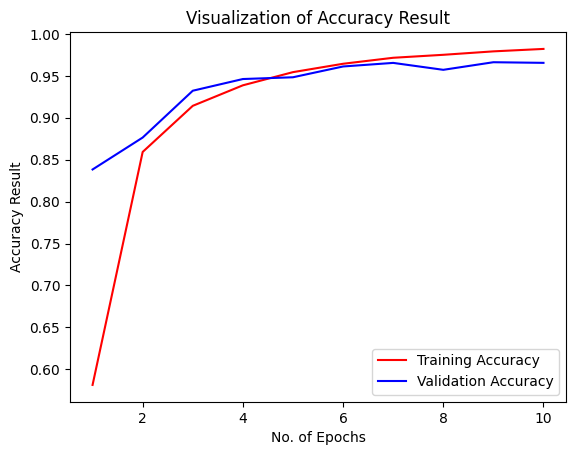

In [75]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

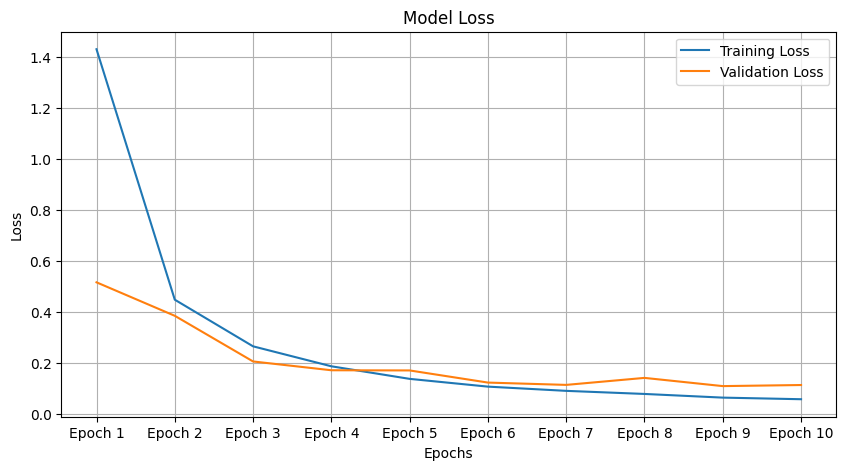

In [3]:
import matplotlib.pyplot as plt

# Training and validation loss values
history = {
    'loss': [
        1.4290525913238525,
        0.4467775523662567,
        0.26390981674194336,
        0.185645192861557,
        0.13631099462509155,
        0.10587283223867416,
        0.08929206430912018,
        0.07718028873205185,
        0.06278533488512039,
        0.056492388248443604
    ],
    'val_loss': [
        0.5149209499359131,
        0.38362714648246765,
        0.2045743316411972,
        0.1700768619775772,
        0.16936814785003662,
        0.12175314873456955,
        0.11269131302833557,
        0.14014238119125366,
        0.1079273521900177,
        0.11217556148767471
    ]
}

# Plotting the model loss
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(ticks=range(10), labels=[f'Epoch {i+1}' for i in range(10)]) 
plt.legend()
plt.grid(True)
plt.show()


## Some other metrics for model evaluation

In [79]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [80]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [82]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 133s 241ms/step


(array([[9.99999762e-01, 1.56728788e-07, 2.94226088e-10, ...,
         3.13562851e-15, 6.67955884e-14, 2.56405059e-13],
        [9.93969321e-01, 6.03013113e-03, 2.08220214e-08, ...,
         4.58662793e-15, 4.37861726e-12, 7.68784667e-13],
        [1.00000000e+00, 6.05163253e-10, 1.20462095e-11, ...,
         1.45361338e-18, 8.29684071e-16, 3.35540117e-15],
        ...,
        [9.21328916e-11, 8.00733449e-14, 1.13353620e-08, ...,
         4.87193549e-11, 1.24514097e-11, 9.99977946e-01],
        [5.41309636e-11, 1.03207244e-13, 7.38363148e-10, ...,
         7.75184777e-11, 5.77129317e-12, 9.99999285e-01],
        [6.30185805e-20, 3.79900644e-23, 8.27602888e-19, ...,
         6.61800712e-21, 6.36425913e-20, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [85]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [86]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [87]:
true_categories= tf.concat( [y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [88]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.96       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.88      0.93       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [94]:
cm= confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

## Confusion Matrix Visualization

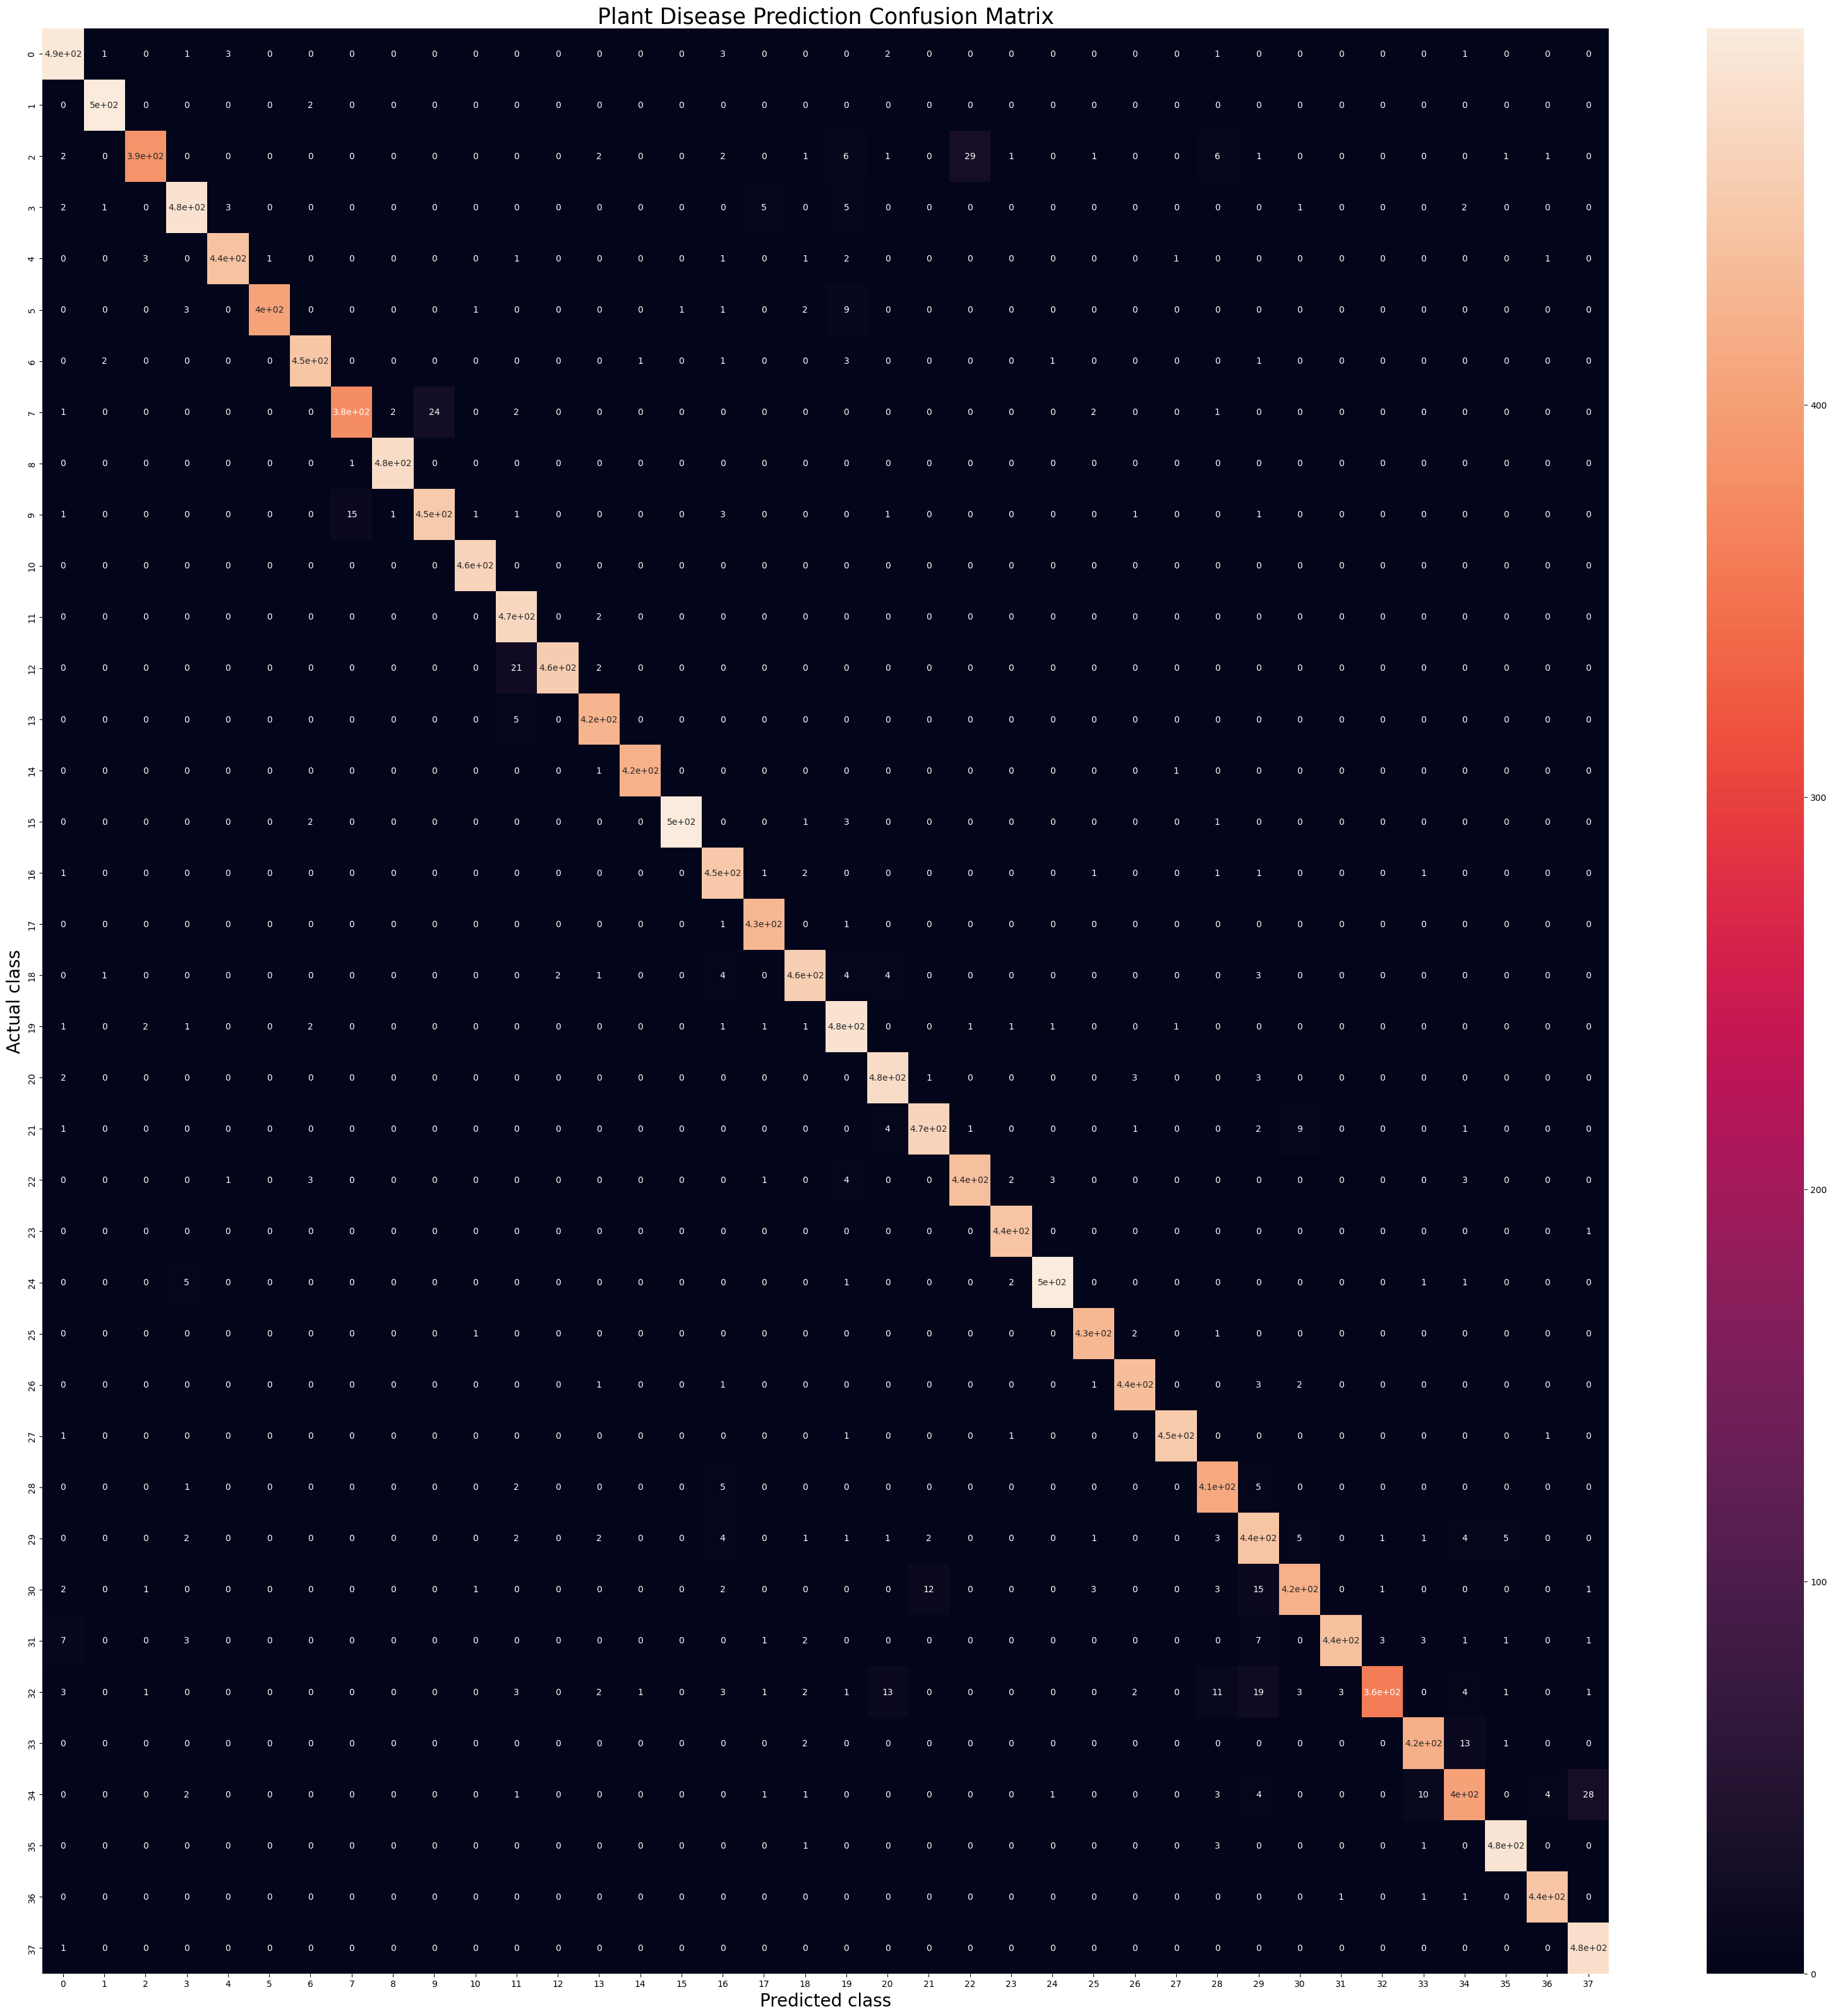

In [103]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

Found 70300 files belonging to 38 classes.


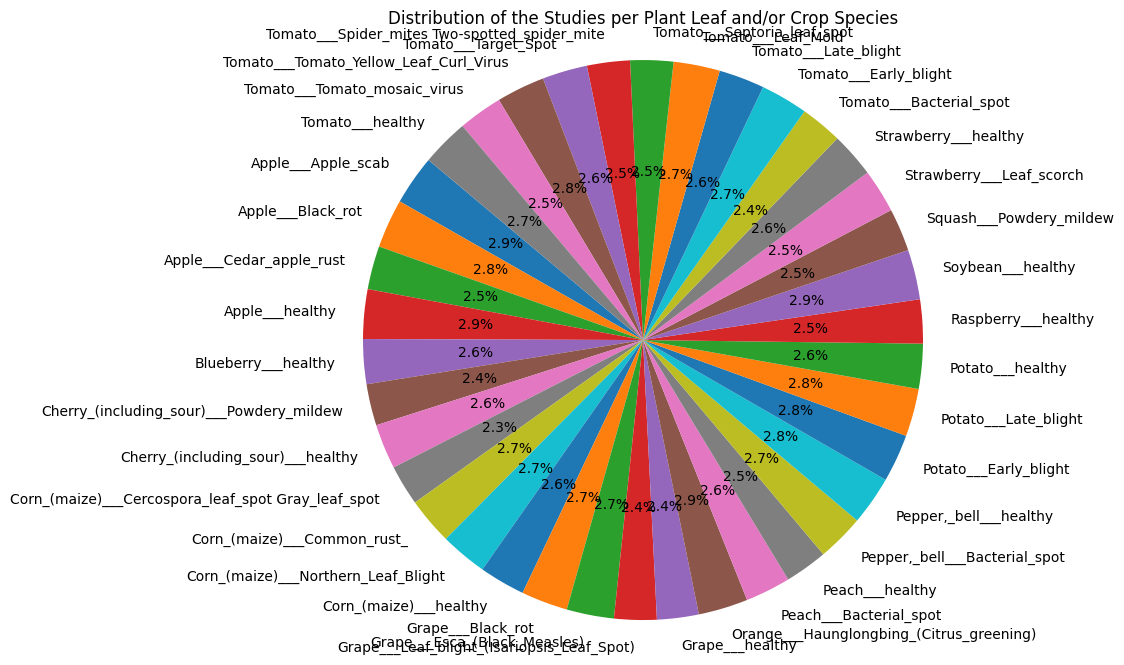

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Get the class names
class_names = training_set.class_names

# Initialize a dictionary to hold class counts
class_counts = {class_name: 0 for class_name in class_names}

# Count the number of images in each class
for images, labels in training_set:
    for label in labels:
        class_index = label.numpy().argmax()
        class_counts[class_names[class_index]] += 1

# Convert the class counts to a pandas DataFrame
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(df_class_counts['Count'], labels=df_class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the Studies per Plant Leaf and/or Crop Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


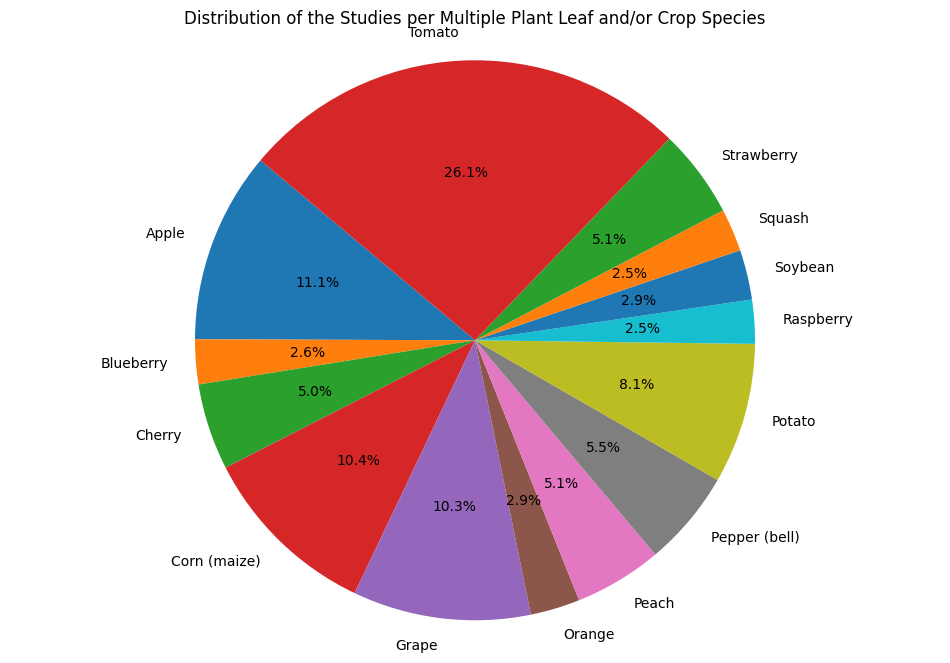

In [3]:


# Get the class names
class_names = training_set.class_names

# Define groups for multiple species
grouped_classes = {
    'Apple': ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy'],
    'Blueberry': ['Blueberry___healthy'],
    'Cherry': ['Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy'],
    'Corn (maize)': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy'],
    'Grape': ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy'],
    'Orange': ['Orange___Haunglongbing_(Citrus_greening)'],
    'Peach': ['Peach___Bacterial_spot', 'Peach___healthy'],
    'Pepper (bell)': ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy'],
    'Potato': ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'],
    'Raspberry': ['Raspberry___healthy'],
    'Soybean': ['Soybean___healthy'],
    'Squash': ['Squash___Powdery_mildew'],
    'Strawberry': ['Strawberry___Leaf_scorch', 'Strawberry___healthy'],
    'Tomato': [
        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
        'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
    ]
}

# Initialize a dictionary to hold grouped class counts
grouped_class_counts = {group: 0 for group in grouped_classes}

# Count the number of images in each group
for images, labels in training_set:
    for label in labels:
        class_index = label.numpy().argmax()
        class_name = class_names[class_index]
        for group, classes in grouped_classes.items():
            if class_name in classes:
                grouped_class_counts[group] += 1
                break

# Convert the grouped class counts to a pandas DataFrame
df_grouped_class_counts = pd.DataFrame(list(grouped_class_counts.items()), columns=['Group', 'Count'])

# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(df_grouped_class_counts['Count'], labels=df_grouped_class_counts['Group'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the Studies per Multiple Plant Leaf and/or Crop Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
